## 필수과제 1
1. simpleimputer (간단한 개념이라 리서치하시고 실제 코드 작성하시고 값에 대해서 결과 정리까지)
- 다양하게 통계치 지정할 수 있음 (평균, 최빈값 등등)
- 결과가 어떤식으로 바뀌는지 mpg 데이터를 가지고 확인

#### simpleimputer
- scikit-learn에서 제공
- 데이터 셋의 결측치값(missing value)를 특정한 값으로 채우는 기능

In [2]:
from sklearn.impute import SimpleImputer # simpleimputer impute함
import pandas as pd
import numpy as np
import seaborn as sns
import random
df = sns.load_dataset('mpg')

In [3]:
df.head() # 상위 데이터 5개 출력

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
# 결측치 개수 확인
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [28]:
df_sp = df[['weight','mpg','model_year','horsepower']]

In [29]:
df_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   weight      398 non-null    int64  
 1   mpg         398 non-null    float64
 2   model_year  398 non-null    int64  
 3   horsepower  392 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 12.6 KB


In [30]:
df_sp.isna()

,weight,mpg,model_year,horsepower
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
393,False,False,False,False
394,False,False,False,False
395,False,False,False,False
396,False,False,False,False


### strategy
- mean (평균값)
- median (중앙값)
- most_frequent (최빈값)

In [8]:
# 평균값
pm=SimpleImputer(missing_values=np.nan, strategy='mean')
mean_pm = pm.fit_transform(df_sp)
print(mean_pm)
# fit_transform -> fit과 transform을 한번에 실행

[[3504.   18.   70.  130.]
 [3693.   15.   70.  165.]
 [3436.   18.   70.  150.]
 ...
 [2295.   32.   82.   84.]
 [2625.   28.   82.   79.]
 [2720.   31.   82.   82.]]


In [9]:
mean_pm = pd.DataFrame(mean_pm)
mean_pm.columns = ['weight','mpg','model_year','horsepower']
print(mean_pm)

     weight   mpg  model_year  horsepower
0    3504.0  18.0        70.0       130.0
1    3693.0  15.0        70.0       165.0
2    3436.0  18.0        70.0       150.0
3    3433.0  16.0        70.0       150.0
4    3449.0  17.0        70.0       140.0
..      ...   ...         ...         ...
393  2790.0  27.0        82.0        86.0
394  2130.0  44.0        82.0        52.0
395  2295.0  32.0        82.0        84.0
396  2625.0  28.0        82.0        79.0
397  2720.0  31.0        82.0        82.0

[398 rows x 4 columns]


In [10]:
mean_pm.model_year.mean(0)

76.01005025125629

In [11]:
# 중간값
pm = SimpleImputer(missing_values=np.nan, strategy='median')
medi_pm = pm.fit_transform(df_sp)
print(medi_pm)

[[3504.   18.   70.  130.]
 [3693.   15.   70.  165.]
 [3436.   18.   70.  150.]
 ...
 [2295.   32.   82.   84.]
 [2625.   28.   82.   79.]
 [2720.   31.   82.   82.]]


In [12]:
medi_pm = pd.DataFrame(medi_pm)
medi_pm.columns = ['weight','mpg','model_year','horsepower']
print(medi_pm)

     weight   mpg  model_year  horsepower
0    3504.0  18.0        70.0       130.0
1    3693.0  15.0        70.0       165.0
2    3436.0  18.0        70.0       150.0
3    3433.0  16.0        70.0       150.0
4    3449.0  17.0        70.0       140.0
..      ...   ...         ...         ...
393  2790.0  27.0        82.0        86.0
394  2130.0  44.0        82.0        52.0
395  2295.0  32.0        82.0        84.0
396  2625.0  28.0        82.0        79.0
397  2720.0  31.0        82.0        82.0

[398 rows x 4 columns]


In [13]:
medi_pm.model_year.mean()

76.01005025125629

In [14]:
# 최빈값
pm=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
fre_pm = pm.fit_transform(df_sp)
print(fre_pm)

[[3504.   18.   70.  130.]
 [3693.   15.   70.  165.]
 [3436.   18.   70.  150.]
 ...
 [2295.   32.   82.   84.]
 [2625.   28.   82.   79.]
 [2720.   31.   82.   82.]]


In [15]:
fre_pm = pd.DataFrame(fre_pm)
fre_pm.columns = ['weight','mpg','model_year','horsepower']
print(fre_pm)

     weight   mpg  model_year  horsepower
0    3504.0  18.0        70.0       130.0
1    3693.0  15.0        70.0       165.0
2    3436.0  18.0        70.0       150.0
3    3433.0  16.0        70.0       150.0
4    3449.0  17.0        70.0       140.0
..      ...   ...         ...         ...
393  2790.0  27.0        82.0        86.0
394  2130.0  44.0        82.0        52.0
395  2295.0  32.0        82.0        84.0
396  2625.0  28.0        82.0        79.0
397  2720.0  31.0        82.0        82.0

[398 rows x 4 columns]


In [16]:
fre_pm.model_year.mean()

76.01005025125629

In [31]:
x=np.random.randint(0,389,size=30)
df_sp.iloc[x] = np.nan

In [32]:
df_simpleimputer = pd.concat([df_sp ,df['mpg']],axis=1) # 결측치 만들고 y값과 붙이기 

In [33]:
df_mean =pd.concat([df_sp ,df['mpg']],axis=1)
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df_mean = imp_mean.fit_transform(df_mean)
df_mean

array([[3504.,   18.,   70.,  130.,   18.],
       [3693.,   15.,   70.,  165.,   15.],
       [3436.,   18.,   70.,  150.,   18.],
       ...,
       [2295.,   32.,   82.,   84.,   32.],
       [2625.,   28.,   82.,   79.,   28.],
       [2720.,   31.,   82.,   82.,   31.]])

In [34]:
df_mean=pd.DataFrame(df_mean)
df_mean.columns = ['weight','mpg','model_year','horsepower','displacement']
df_mean

,weight,mpg,model_year,horsepower,displacement
0,3504.0,18.0,70.0,130.0,18.0
1,3693.0,15.0,70.0,165.0,15.0
2,3436.0,18.0,70.0,150.0,18.0
3,3433.0,16.0,70.0,150.0,16.0
4,3449.0,17.0,70.0,140.0,17.0
...,...,...,...,...,...
393,2790.0,27.0,82.0,86.0,27.0
394,2130.0,44.0,82.0,52.0,44.0
395,2295.0,32.0,82.0,84.0,32.0
396,2625.0,28.0,82.0,79.0,28.0


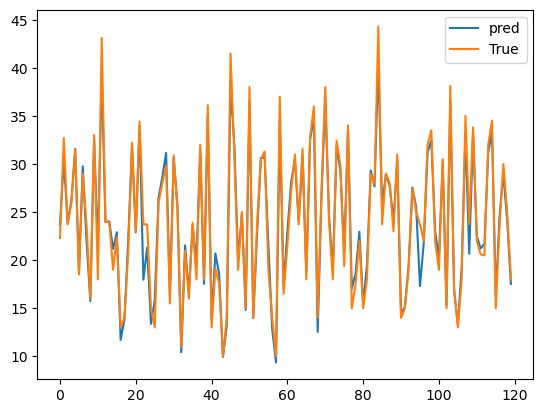

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_mean.drop('mpg',axis=1), df_mean['mpg'],test_size=0.3, random_state=111)

import statsmodels.api as sm #회귀 분석 모듈
import matplotlib.pyplot as plt # 시각화 모듈

fit_train1 = sm.OLS(y_train, x_train) # 회귀분석 진행하기 (다중회귀)
fit_train1 = fit_train1.fit() # 회귀분석 Fit 모델

plt.plot(np.array(fit_train1.predict(x_test)),label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_true = y_test, y_pred = fit_train1.predict(x_test))
print(mse1)

2.0789272828283463


In [38]:
df_median =pd.concat([df_sp ,df['mpg']],axis=1)
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
df_median =imp_median.fit_transform(df_mean)
df_median

array([[3504.,   18.,   70.,  130.,   18.],
       [3693.,   15.,   70.,  165.,   15.],
       [3436.,   18.,   70.,  150.,   18.],
       ...,
       [2295.,   32.,   82.,   84.,   32.],
       [2625.,   28.,   82.,   79.,   28.],
       [2720.,   31.,   82.,   82.,   31.]])

In [40]:
df_median=pd.DataFrame(df_median)
df_median.columns = ['weight','mpg','model_year','horsepower','displacement']
df_median

,weight,mpg,model_year,horsepower,displacement
0,3504.0,18.0,70.0,130.0,18.0
1,3693.0,15.0,70.0,165.0,15.0
2,3436.0,18.0,70.0,150.0,18.0
3,3433.0,16.0,70.0,150.0,16.0
4,3449.0,17.0,70.0,140.0,17.0
...,...,...,...,...,...
393,2790.0,27.0,82.0,86.0,27.0
394,2130.0,44.0,82.0,52.0,44.0
395,2295.0,32.0,82.0,84.0,32.0
396,2625.0,28.0,82.0,79.0,28.0


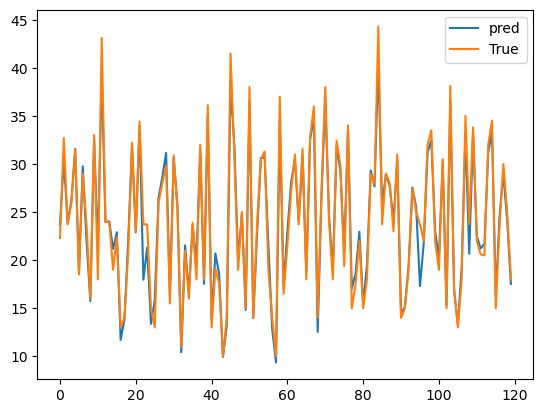

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_median.drop('mpg',axis=1), df_median['mpg'],test_size=0.3, random_state=111)

import statsmodels.api as sm #회귀 분석 모듈
import matplotlib.pyplot as plt # 시각화 모듈

fit_train2 = sm.OLS(y_train, x_train) # 회귀분석 진행하기 (다중회귀)
fit_train2 = fit_train2.fit() # 회귀분석 Fit 모델

plt.plot(np.array(fit_train2.predict(x_test)),label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(y_true = y_test, y_pred = fit_train2.predict(x_test))
print(mse2)

2.0789272828283463
